In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
140876,2013-07-29,Darwin,17.6,32.3,0.0,4.4,10.1,ESE,37.0,NE,...,68.0,44.0,1014.7,1010.2,7.0,7.0,24.4,29.6,No,No
104437,2014-05-28,Nuriootpa,11.6,16.5,3.6,1.3,4.9,W,43.0,WNW,...,94.0,84.0,1016.0,1016.8,7.0,7.0,12.3,14.6,Yes,No
136487,2010-01-21,AliceSprings,17.6,37.8,0.0,10.6,13.1,W,30.0,ENE,...,14.0,7.0,1008.6,1004.1,1.0,1.0,31.1,37.5,No,No
144647,2015-04-05,Uluru,20.8,31.8,0.0,NaN,NaN,S,44.0,SE,...,52.0,28.0,1014.9,1011.2,1.0,4.0,22.8,30.8,No,No
78204,2009-08-04,Watsonia,8.7,14.3,0.0,3.8,2.5,N,48.0,N,...,64.0,67.0,1017.6,1015.9,7.0,7.0,10.3,13.1,No,Yes


In [4]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Using Random Forest for making decisions

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)
df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], inplace=True)

In [6]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,6,2017
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6,2017
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6,2017
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6,2017


From previous intutions changing in columns or removing heavily missing columns does not affect much the distribution

In [7]:
df.select_dtypes(include=['int','float']).corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Year
MinTemp,1.000000,0.732321,0.104940,0.472470,0.070985,0.178408,0.180502,0.175913,-0.237689,0.007891,-0.447389,-0.457072,0.077855,0.019215,0.900854,0.707429,-0.206970,0.021817
MaxTemp,0.732321,1.000000,-0.074986,0.597435,0.468314,0.068235,0.014710,0.044972,-0.510013,-0.509097,-0.327019,-0.421555,-0.288133,-0.278702,0.885901,0.984533,-0.169340,0.044849
Rainfall,0.104940,-0.074986,1.000000,-0.072096,-0.228739,0.133002,0.088225,0.061103,0.224289,0.255368,-0.166450,-0.125247,0.197776,0.172001,0.010348,-0.078803,-0.029907,-0.011300
Evaporation,0.472470,0.597435,-0.072096,1.000000,0.365074,0.202041,0.195161,0.127013,-0.511897,-0.395673,-0.270178,-0.293379,-0.187796,-0.184785,0.551790,0.578945,-0.033011,0.081896
Sunshine,0.070985,0.468314,-0.228739,0.365074,1.000000,-0.037993,0.005100,0.048005,-0.492189,-0.628979,0.044659,-0.017196,-0.675429,-0.703868,0.289669,0.488835,0.023928,0.015010
WindGustSpeed,0.178408,0.068235,0.133002,0.202041,-0.037993,1.000000,0.602694,0.686463,-0.211379,-0.022853,-0.456885,-0.412482,0.072655,0.111877,0.147395,0.028974,0.059671,-0.031886
WindSpeed9am,0.180502,0.014710,0.088225,0.195161,0.005100,0.602694,1.000000,0.514228,-0.267511,-0.026109,-0.225933,-0.173748,0.023706,0.057057,0.129710,-0.000864,0.051272,-0.018994
WindSpeed3pm,0.175913,0.044972,0.061103,0.127013,0.048005,0.686463,0.514228,1.000000,-0.136075,0.029778,-0.295695,-0.255944,0.056971,0.031542,0.161720,0.018646,0.060870,-0.034334
Humidity9am,-0.237689,-0.510013,0.224289,-0.511897,-0.492189,-0.211379,-0.267511,-0.136075,1.000000,0.668347,0.138617,0.186367,0.454118,0.358368,-0.477253,-0.500603,-0.088566,0.009833
Humidity3pm,0.007891,-0.509097,0.255368,-0.395673,-0.628979,-0.022853,-0.026109,0.029778,0.668347,1.000000,-0.028546,0.051453,0.516753,0.522230,-0.222789,-0.558005,-0.017583,-0.009092


In [8]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['RainTomorrow']), df['RainTomorrow'], test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline

continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer()),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([  
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])
imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')

x_train_trf1 = imputation.fit_transform(x_train)
x_test_trf1 = imputation.transform(x_test)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_trf1, y_train_encoded)
y_pred = rfc.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(F'Train Accuracy: {accuracy_score(y_train_encoded, rfc.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 0.8586908119340952
Train Accuracy: 0.9999907227876168
[[20206   856]
 [ 2952  2934]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, criterion='entropy', bootstrap=True, max_features=0.5, max_samples=0.7)
rfc.fit(x_train_trf1, y_train_encoded)
y_pred = rfc.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(F'Train Accuracy: {accuracy_score(y_train_encoded, rfc.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 0.8540522487754193
Train Accuracy: 0.8710281934484326
[[20172   890]
 [ 3043  2843]]


In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, x_train_trf1, y_train_encoded, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.85853432 0.853697   0.85416087 0.85536692 0.85351146 0.85471751
 0.85341868 0.86167548 0.84998608 0.85174877]
Mean cross-validation score: 0.8546817094876815


In [13]:
continuous_cols = x_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = x_train.select_dtypes(include='object').columns.tolist()
ohe = imputation.named_transformers_['CategoricalPipeline'].named_steps['encoder']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)  
all_feature_names = list(continuous_cols) + list(ohe_feature_names)

In [14]:
import pandas as pd
from collections import defaultdict
feature_importances = rfc.feature_importances_
importance_dict = defaultdict(float)

for feature_name, importance in zip(all_feature_names, feature_importances):
    
    if '_' in feature_name:
        original_feature = feature_name.split('_')[0]
    else:
        original_feature = feature_name
    importance_dict[original_feature] += importance
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)


<Axes: xlabel='Importance', ylabel='Feature'>

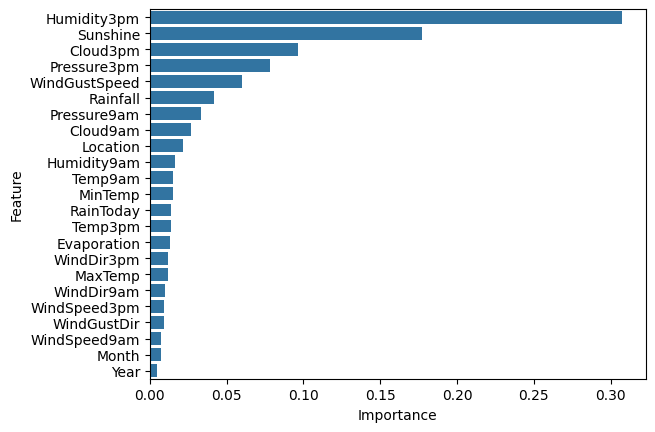

In [15]:
sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'])

From Feature Importance taking the best possible importance.

In [26]:
new_df = df.copy()
new_df.drop(columns=['Year','Month','WindSpeed9am','WindSpeed3pm','WindGustDir','WindDir9am','WindDir3pm'], inplace=True)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(new_df.drop(columns=['RainTomorrow']), new_df['RainTomorrow'], test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline

continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=100, tol=0.001)),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([  
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])
imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')

x_train_trf1 = imputation.fit_transform(x_train)
x_test_trf1 = imputation.transform(x_test)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_trf1, y_train_encoded)
y_pred = rfc.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(F'Train Accuracy: {accuracy_score(y_train_encoded, rfc.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, criterion='gini', bootstrap=True, max_features=0.5, max_samples=0.7)
rfc.fit(x_train_trf1, y_train_encoded)
y_pred = rfc.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(F'Train Accuracy: {accuracy_score(y_train_encoded, rfc.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, x_train_trf1, y_train_encoded, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Test Accuracy: 0.8583568353866706
Train Accuracy: 1.0
[[20166   896]
 [ 2921  2965]]
Test Accuracy: 0.8523081490277572
Train Accuracy: 0.8734866547299868
[[20151   911]
 [ 3069  2817]]
Cross-validation scores: [0.85881262 0.85332591 0.85490305 0.85397532 0.85221264 0.85471751
 0.85499583 0.86084052 0.85017163 0.85221264]
Mean cross-validation score: 0.854616765816718


Removing the highest nan dependent columns

0.8519741724803325
0.8690243155736564


<Axes: xlabel='Importance', ylabel='Feature'>

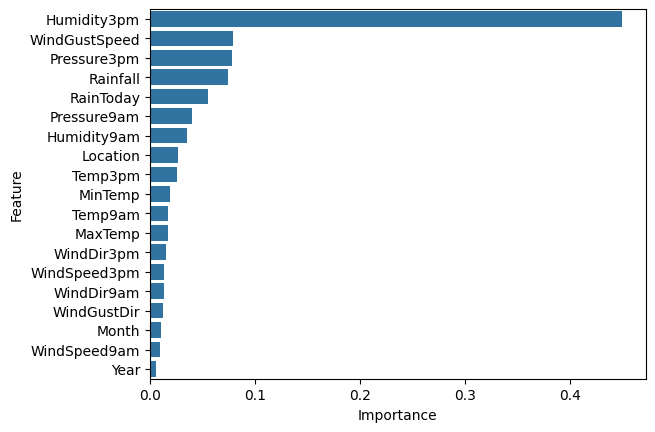

In [17]:
new_df2 = df.copy()
new_df2.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(new_df2.drop(columns=['RainTomorrow']), new_df2['RainTomorrow'], test_size=0.2, random_state=42)
continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=100, tol=0.001)),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([  
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])
imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')
x_train_trf2 = imputation.fit_transform(x_train)
x_test_trf2 = imputation.transform(x_test)

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, criterion='entropy', bootstrap=True, max_features=0.5, max_samples=0.7)
rfc.fit(x_train_trf2, y_train_encoded)
y_pred = rfc.predict(x_test_trf2)
print(accuracy_score(y_test_encoded, y_pred))
print(accuracy_score(y_train_encoded, (rfc.predict(x_train_trf2))))
feature_importances = rfc.feature_importances_
importance_dict = defaultdict(float)
continuous_cols = x_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = x_train.select_dtypes(include='object').columns.tolist()
ohe = imputation.named_transformers_['CategoricalPipeline'].named_steps['encoder']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)  
all_feature_names = list(continuous_cols) + list(ohe_feature_names)
for feature_name, importance in zip(all_feature_names, feature_importances):
    if '_' in feature_name:
        original_feature = feature_name.split('_')[0]
    else:
        original_feature = feature_name
    importance_dict[original_feature] += importance
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)
sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'])

In [25]:
new_df2 = df.copy()
new_df2.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','Year','Month','WindGustDir','WindDir9am','WindDir3pm','WindSpeed3pm'], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(new_df2.drop(columns=['RainTomorrow']), new_df2['RainTomorrow'], test_size=0.2, random_state=42)
continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=1000, tol=0.003)),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])
categorical_pipeline = Pipeline([  
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])
imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')
x_train_trf2 = imputation.fit_transform(x_train)
x_test_trf2 = imputation.transform(x_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
rfc = RandomForestClassifier(n_estimators=300, max_depth=10, n_jobs=-1, criterion='gini', bootstrap=True, max_features=0.5, max_samples=0.9, min_samples_leaf=5)
rfc.fit(x_train_trf2, y_train_encoded)
y_pred = rfc.predict(x_test_trf2)
print(accuracy_score(y_test_encoded, y_pred))
print(accuracy_score(y_train_encoded, (rfc.predict(x_train_trf2))))

0.8527534510909901
0.8690707016355725


Here we notice highest 2.01% deviation. For each situation these 2 models based on random forest quite well and we can use them for different purposes in different scenerios. Further model development using Random Forest can be done using this. In the case of predicting rain confusion matrix is not so important. So we denied it at last and cross validation will be quite similar; from previous intution. 